In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyscf
from qiskit_nature.second_q.drivers import PySCFDriver
import qiskit_nature
import qiskit_nature.units as units
import qiskit_nature.second_q.mappers as mapp
from qiskit_nature.second_q.algorithms import GroundStateEigensolver, NumPyMinimumEigensolverFactory
import matplotlib.pyplot as plt

In [2]:
# Initialize Molecule
driver = PySCFDriver(
    atom ='H 0 0 0; H 0 0 {}'.format(1.401),
    unit = units.DistanceUnit.BOHR,
    charge = 0,
    spin = 0,
    basis="sto3g"
)
hydrogen = driver.run()

# Get Hamiltonian
hamiltonian = hydrogen.hamiltonian

# Wave functions
# 0 = symmetric, up
# 1 = antisymmetric, up
# 2 = symmetric, down
# 3 = antisymmetric, down



In [7]:
h00 = -1.2524773039821462
h11 = -0.4759344611440742
h2002 = 0.33724655166300394*2
h3113 = 0.3486989749102101*2
h3232 = 0.09064376790616309*2
h1221 = 0.33173602243028055*2

0.6973979498204202

In [3]:
# Convert to second quantization
sq_form = hamiltonian.second_q_op()
sq_form

FermionicOp({'+_0 +_0 -_0 -_0': 0.33724655166300394, '+_0 +_0 -_1 -_1': 0.0906437679061631, '+_0 +_1 -_0 -_1': 0.09064376790616306, '+_0 +_1 -_1 -_0': 0.33173602243028044, '+_0 +_2 -_2 -_0': 0.33724655166300394, '+_0 +_2 -_3 -_1': 0.0906437679061631, '+_0 +_3 -_2 -_1': 0.09064376790616306, '+_0 +_3 -_3 -_0': 0.33173602243028044, '+_1 +_0 -_0 -_1': 0.33173602243028055, '+_1 +_0 -_1 -_0': 0.09064376790616309, '+_1 +_1 -_0 -_0': 0.09064376790616316, '+_1 +_1 -_1 -_1': 0.3486989749102101, '+_1 +_2 -_2 -_1': 0.33173602243028055, '+_1 +_2 -_3 -_0': 0.09064376790616309, '+_1 +_3 -_2 -_0': 0.09064376790616316, '+_1 +_3 -_3 -_1': 0.3486989749102101, '+_2 +_0 -_0 -_2': 0.33724655166300394, '+_2 +_0 -_1 -_3': 0.0906437679061631, '+_2 +_1 -_0 -_3': 0.09064376790616306, '+_2 +_1 -_1 -_2': 0.33173602243028044, '+_2 +_2 -_2 -_2': 0.33724655166300394, '+_2 +_2 -_3 -_3': 0.0906437679061631, '+_2 +_3 -_2 -_3': 0.09064376790616306, '+_2 +_3 -_3 -_2': 0.33173602243028044, '+_3 +_0 -_0 -_3': 0.331736022430

In [4]:
# Get nuclear repulsion, since it is not included in the electronic hamiltonian above
hamiltonian.nuclear_repulsion_energy -1.85105

-1.137274125624554

In [22]:
BKconverter = mapp.QubitConverter(mapp.BravyiKitaevMapper())
JWconverter = mapp.QubitConverter(mapp.JordanWignerMapper())
Parityconverter = mapp.QubitConverter(mapp.ParityMapper())

BKHam = BKconverter.convert(sq_form)
JWHam = JWconverter.convert(sq_form)
ParityHam = Parityconverter.convert(sq_form)
print(BKHam)

-0.812610724885215 * IIII
+ 0.17120123768237194 * IIIZ
- 0.22279639536026685 * IIZZ
+ 0.12054612726205871 * IIZI
+ 0.17120123768237205 * IZII
+ 0.168623275831502 * IZIZ
+ 0.04532188395308155 * ZXIX
- 0.04532188395308155 * IXZX
- 0.04532188395308155 * ZXZX
+ 0.04532188395308155 * IXIX
- 0.22279639536026719 * ZZZI
+ 0.16586801121514025 * ZZZZ
+ 0.16586801121514028 * IZZZ
+ 0.17434948745510506 * ZZIZ
+ 0.12054612726205871 * ZIZI


In [23]:
print(JWHam)

-0.812610724885215 * IIII
+ 0.17120123768237194 * IIIZ
- 0.22279639536026685 * IIZI
+ 0.12054612726205871 * IIZZ
+ 0.17120123768237205 * IZII
+ 0.168623275831502 * IZIZ
+ 0.04532188395308155 * YYYY
+ 0.04532188395308155 * XXYY
+ 0.04532188395308155 * YYXX
+ 0.04532188395308155 * XXXX
- 0.22279639536026719 * ZIII
+ 0.16586801121514025 * ZIIZ
+ 0.16586801121514028 * IZZI
+ 0.17434948745510506 * ZIZI
+ 0.12054612726205871 * ZZII


In [4]:
from qiskit_nature.second_q.algorithms import GroundStateEigensolver, NumPyMinimumEigensolverFactory
solver = GroundStateEigensolver(
        mapp.QubitConverter(mapp.JordanWignerMapper()),
        NumPyMinimumEigensolverFactory(),
    )
res = solver.solve(hydrogen)
res.total_energies[0]


-1.137270422065284

In [14]:
distance = np.arange(0.5, 4.02, 0.02)
energy = np.zeros(len(distance))
solver = GroundStateEigensolver(
        mapp.QubitConverter(mapp.JordanWignerMapper()),
        NumPyMinimumEigensolverFactory(),
    )
for i in range(len(distance)):
    driver = PySCFDriver(
        atom ='H 0 0 0; H 0 0 {}'.format(distance[i]),
        unit = units.DistanceUnit.BOHR,
        charge = 0,
        spin = 0,
        basis="sto3g"
    )
    hydrogen = driver.run()
    energy[i] = solver.solve(hydrogen).total_energies[0]

Text(0, 0.5, 'ground state energy (a.u.)')

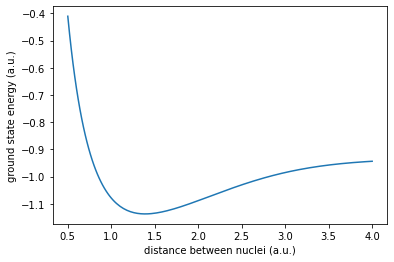

In [17]:
plt.plot(distance, energy)
plt.xlabel('distance between nuclei (a.u.)')
plt.ylabel('ground state energy (a.u.)')

In [16]:
min_index_energy = np.argmin(energy)
distance[min_index_energy]

1.3800000000000008